In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = data['label']
df.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
df = df.loc[1000:]

In [6]:
df1 = pd.get_dummies(df, columns = ['label'])
df1 = np.array(df1)
df1 = df1.T
print(df1)

[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [7]:
df1.shape

(10, 41000)

In [8]:
data = np.array(data)

In [9]:
data.shape

(42000, 785)

In [10]:
m, n = data.shape

In [11]:
n

785

In [12]:
#np.random.shuffle(data)

In [13]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

In [14]:
data_dev.shape

(785, 1000)

In [15]:
Y_dev.shape

(1000,)

In [16]:
X_dev.shape

(784, 1000)

In [17]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [18]:
X_train.shape

(784, 41000)

In [19]:
Y_train.shape

(41000,)

In [35]:
def init_params():
    W1 = np.random.rand(100,784) - 0.5
    b1 = np.random.rand(100,1) - 0.5
    W2 = np.random.rand(10,100) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    
    return W1,b1,W2,b2
    
    

In [36]:
def ReLU(Z):
    return np.maximum(Z,0)

In [37]:
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

In [38]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 =  W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
    

In [40]:
len(Y_train)

41000

In [41]:
Y_train.size

41000

In [42]:
Y_train.max()

9

In [43]:
def deriv_ReLU(Z):
    return Z > 0

In [44]:
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    #one_hot_Y = one_hot(Y)
    dZ2 = A2 -df1#one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2 , axis=1 , keepdims=True)
    dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1 , keepdims= True)
    return dW1,db1,dW2,db2
    

In [45]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [46]:
def get_predictions(A2):
    return np.argmax(A2,0)

In [47]:
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

In [48]:
def gradient_descent(X , Y , iterations , alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2  = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i%10 == 0:
            print('Iteration: ' , i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
            
    return  W1,b1,W2,b2
        

In [49]:
W1,b1,W2,b2 = gradient_descent(X_train , Y_train , 500 , 0.1)

Iteration:  0
[6 9 8 ... 6 6 6] [1 5 1 ... 7 6 9]
Accuracy:  0.11721951219512194
Iteration:  10
[1 9 1 ... 3 6 0] [1 5 1 ... 7 6 9]
Accuracy:  0.5048780487804878
Iteration:  20
[1 9 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.6464878048780488
Iteration:  30
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.7095121951219512
Iteration:  40
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.7468536585365854
Iteration:  50
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.7707560975609756
Iteration:  60
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.7883902439024391
Iteration:  70
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.8017317073170732
Iteration:  80
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.8125121951219512
Iteration:  90
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.8213170731707317
Iteration:  100
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.8284878048780487
Iteration:  110
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
Accuracy:  0.8343658536585365
Iteration:  120
[1 8 1 ...

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


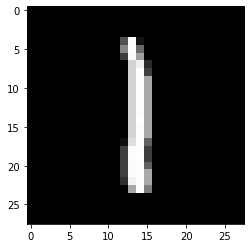

Prediction:  [8]
Label:  5


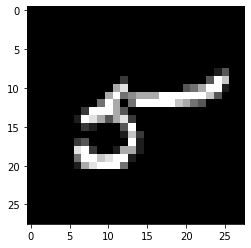

Prediction:  [1]
Label:  1


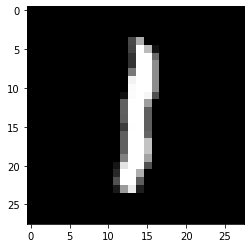

Prediction:  [7]
Label:  7


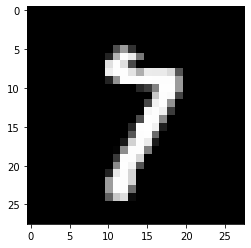

In [51]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [52]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 5 8 0 2 0 2 3 6 9 9 7 8 9 4 9 7 1 3
 1 1 4 5 1 4 7 2 6 5 7 7 4 7 5 1 9 0 2 2 3 9 1 1 8 7 0 6 3 4 8 1 0 3 9 6 3
 6 4 7 1 4 1 5 4 8 9 2 9 9 8 9 7 5 6 4 6 4 9 1 2 0 5 9 2 7 7 8 8 8 5 0 6 0
 0 2 9 0 4 7 7 1 5 7 9 4 4 1 3 7 6 3 0 4 8 2 8 1 1 7 3 7 2 1 0 3 4 5 4 0 5
 4 5 3 5 1 0 8 3 7 0 9 6 6 9 5 4 6 9 3 8 4 2 8 8 7 9 5 2 8 8 3 6 9 3 1 0 4
 1 5 9 0 6 2 5 7 0 8 0 0 5 3 2 0 0 6 0 0 4 7 2 7 1 9 9 3 9 8 9 6 5 1 3 8 1
 8 7 1 3 7 6 3 6 3 6 3 2 3 6 2 9 9 2 2 2 7 5 5 8 8 2 0 1 9 0 6 3 7 1 1 1 4
 7 0 2 9 2 0 5 6 0 8 9 6 2 0 0 7 2 0 4 2 6 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 3 4 8 5 2 9 7 9 2 9 7 4 9 3 2 9 3 6 3 6 8 8 3 7 0 9 2 7 9 0 9 4 6 8 4
 3 3 1 7 8 9 7 6 2 1 7 0 5 6 5 2 9 0 4 6 2 2 2 5 0 7 7 1 2 6 3 4 8 0 5 9 6
 2 1 9 0 6 0 4 3 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 4 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 9 8 3 0 4 4 8 6 4 1 8 1 5 4 9 4 3 2 0 6 0 7 9 2 9 0 9 6 5
 2 4 4 6 4 8 4 1 7 5 8 9 3 9 3 7 3 8 2 2 7 2 8 9 1 4 3 6 0 2 2 9 1 2 7 2 1
 3 4 9 1 8 0 2 2 3 4 1 3 

0.888